In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
anime=pd.read_csv('anime.csv')

In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime.shape

(12294, 7)

In [5]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [7]:
anime.describe(include="O")

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Saru Kani Gassen,Hentai,TV,1
freq,2,823,3787,5677


In [8]:
rating=pd.read_csv('rating.csv')

In [9]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [10]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [11]:
rating.shape

(7813737, 3)

In [12]:
rating1=rating[rating.rating!=-1]

In [13]:
rating1.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [14]:
rating1.shape

(6337241, 3)

In [15]:
rating1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337241 entries, 47 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 193.4 MB


In [16]:
rating1.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [17]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [18]:
anime1=anime.dropna(subset=['rating'])

In [19]:
anime1.isna().sum()

anime_id     0
name         0
genre       47
type         0
episodes     0
rating       0
members      0
dtype: int64

In [20]:
anime1.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [21]:
anime2=anime1.dropna(subset=['genre'],axis=0)

In [22]:
anime2.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [23]:
from collections import defaultdict
all_genres = defaultdict(int)

for genres in anime2['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

In [24]:
all_genres

defaultdict(int,
            {'Drama': 1977,
             'Romance': 1437,
             'School': 1176,
             'Supernatural': 1001,
             'Action': 2768,
             'Adventure': 2316,
             'Fantasy': 2242,
             'Magic': 747,
             'Military': 416,
             'Shounen': 1684,
             'Comedy': 4575,
             'Historical': 798,
             'Parody': 403,
             'Samurai': 146,
             'Sci-Fi': 2036,
             'Thriller': 86,
             'Sports': 533,
             'Super Power': 451,
             'Space': 377,
             'Slice of Life': 1204,
             'Mecha': 929,
             'Music': 842,
             'Mystery': 485,
             'Seinen': 532,
             'Martial Arts': 264,
             'Vampire': 100,
             'Shoujo': 594,
             'Horror': 362,
             'Police': 195,
             'Psychological': 226,
             'Demons': 287,
             'Ecchi': 628,
             'Josei': 52,
         

In [25]:
genres=sorted(all_genres.items(),key=lambda k:k[1],reverse=True)

In [26]:
genres

[('Comedy', 4575),
 ('Action', 2768),
 ('Adventure', 2316),
 ('Fantasy', 2242),
 ('Sci-Fi', 2036),
 ('Drama', 1977),
 ('Shounen', 1684),
 ('Kids', 1598),
 ('Romance', 1437),
 ('Slice of Life', 1204),
 ('School', 1176),
 ('Hentai', 1133),
 ('Supernatural', 1001),
 ('Mecha', 929),
 ('Music', 842),
 ('Historical', 798),
 ('Magic', 747),
 ('Ecchi', 628),
 ('Shoujo', 594),
 ('Sports', 533),
 ('Seinen', 532),
 ('Mystery', 485),
 ('Super Power', 451),
 ('Military', 416),
 ('Parody', 403),
 ('Space', 377),
 ('Horror', 362),
 ('Harem', 313),
 ('Demons', 287),
 ('Martial Arts', 264),
 ('Dementia', 238),
 ('Psychological', 226),
 ('Police', 195),
 ('Game', 177),
 ('Samurai', 146),
 ('Vampire', 100),
 ('Thriller', 86),
 ('Cars', 72),
 ('Shounen Ai', 62),
 ('Shoujo Ai', 54),
 ('Josei', 52),
 ('Yuri', 41),
 ('Yaoi', 38)]

In [27]:
#top 10 genres
genres=pd.DataFrame(genres)

In [28]:
genres.head(10)

,0,1
0,Comedy,4575
1,Action,2768
2,Adventure,2316
3,Fantasy,2242
4,Sci-Fi,2036
5,Drama,1977
6,Shounen,1684
7,Kids,1598
8,Romance,1437
9,Slice of Life,1204


In [29]:
genres=genres.rename(columns={0:'genre',1:'count'})

In [30]:
genres.head()

,genre,count
0,Comedy,4575
1,Action,2768
2,Adventure,2316
3,Fantasy,2242
4,Sci-Fi,2036


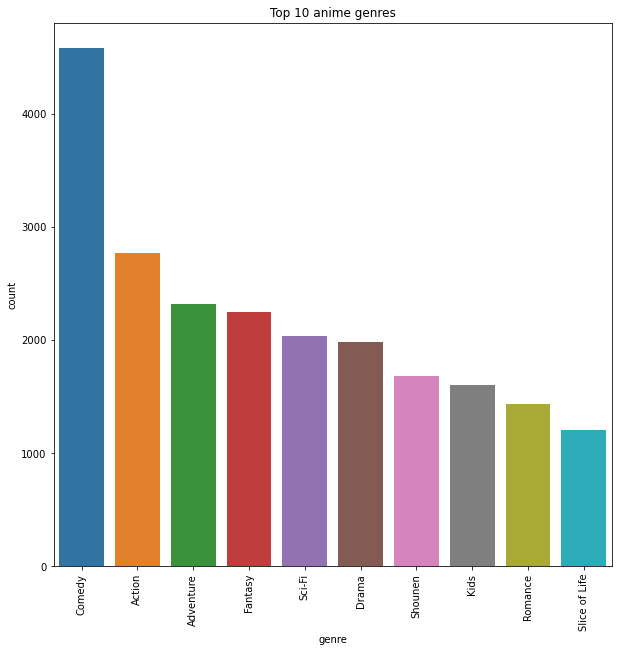

In [31]:
plt.figure(figsize=(10,10))
sns.barplot(x='genre',y='count',data=genres.head(10))
p=plt.xticks(rotation=90)
x=plt.title("Top 10 anime genres")

In [32]:
def weighted_rating(df, m, r):
    t = df['members'] / (m + df['members'])
    return df['rating'] * t + (1-t) * r

In [33]:
m=anime2['members'].quantile(0.75)
m

9588.0

In [34]:
r=anime2['rating'].mean()
r

6.478264125821765

In [35]:
anime2["weighted_rating"] = anime2.apply(weighted_rating, axis=1, args=(m, r))
anime2.head()

,anime_id,name,genre,type,episodes,rating,members,weighted_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9.238109
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9.226796
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9.035423
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9.132222
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,9.000150


In [36]:
anime2=anime2.sort_values(by='weighted_rating',ascending=False)

In [37]:
anime2.head(20)

,anime_id,name,genre,type,episodes,rating,members,weighted_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9.238109
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9.226796
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9.132222
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,9.071612
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9.035423
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,9.006919
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,9.000150
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376,8.969004
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888,8.938820
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,8.901148


In [38]:
#top10 anime
t10anime=anime2

In [39]:
t10anime=t10anime[t10anime.type!='Movie']

In [40]:
t10anime.head(10)

,anime_id,name,genre,type,episodes,rating,members,weighted_rating
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9.226796
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9.132222
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,9.071612
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9.035423
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,9.006919
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,9.000150
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376,8.969004
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888,8.938820
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,8.901148
16,23273,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen",TV,22,8.92,416397,8.865042


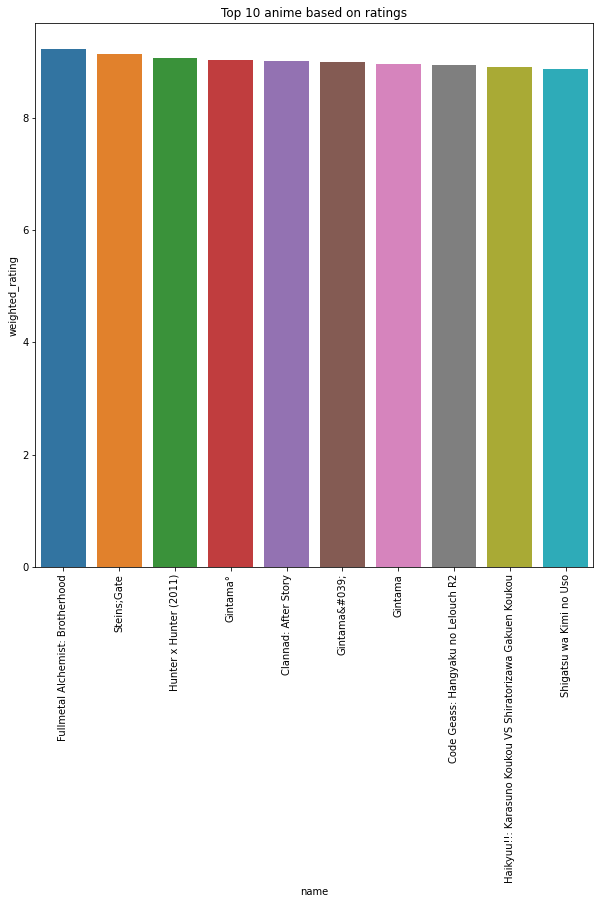

In [41]:
plt.figure(figsize=(10,10))
sns.barplot(x='name',y='weighted_rating',data=t10anime.head(10))
p=plt.xticks(rotation=90)
x=plt.title("Top 10 anime based on ratings")

In [42]:
tm=t10anime.sort_values(by='members',ascending=False)
tm.head(10)

,anime_id,name,genre,type,episodes,rating,members,weighted_rating
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,8.689094
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,8.518177
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,7.815642
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9.226796
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,8.364800
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151,8.798887
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,7.791572
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9.132222
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190,8.047111
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817,8.420617


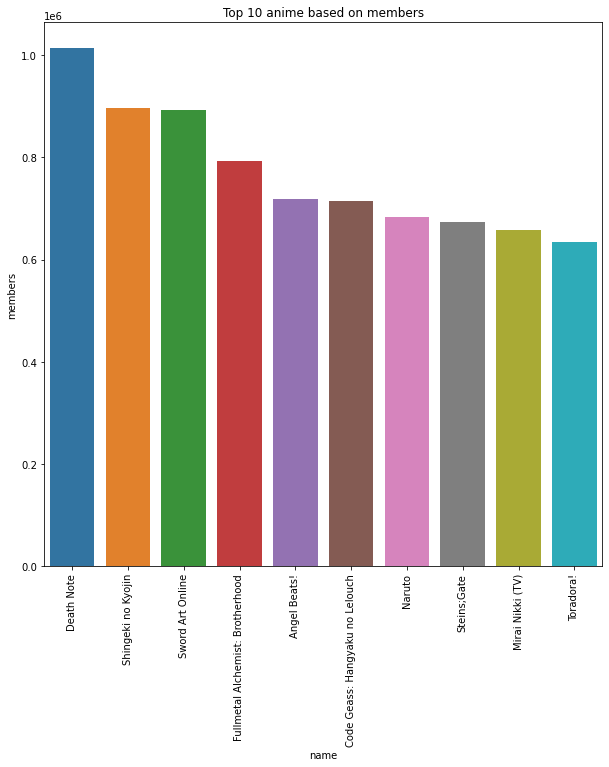

In [43]:
plt.figure(figsize=(10,10))
sns.barplot(x='name',y='members',data=tm.head(10))
p=plt.xticks(rotation=90)
x=plt.title("Top 10 anime based on members")

In [44]:
#top10 anime movies
t10animem=anime2[anime2.type=='Movie']

In [45]:
t10animem.head(10)

,anime_id,name,genre,type,episodes,rating,members,weighted_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9.238109
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254,8.880599
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733,8.830470
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,8.793904
24,164,Mononoke Hime,"Action, Adventure, Fantasy",Movie,1,8.81,339556,8.745967
18,12355,Ookami Kodomo no Ame to Yuki,"Fantasy, Slice of Life",Movie,1,8.84,226193,8.743960
25,7311,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,8.81,240297,8.720532
35,431,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1,8.74,333186,8.676735
60,10408,Hotarubi no Mori e,"Drama, Romance, Shoujo, Supernatural",Movie,1,8.61,197439,8.511273
59,11577,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,"Sci-Fi, Thriller",Movie,1,8.61,192424,8.508822
